<a href="https://colab.research.google.com/github/ARKAL-J04/MachineLearning2025/blob/main/MP_1/AI_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats

#پرسش اول

##بخش اول

In [ ]:
#https://drive.google.com/file/d/1nk5uXntvKwh8jU0tkYFFVysNZVJotsyK/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1nk5uXntvKwh8jU0tkYFFVysNZVJotsyK

Downloading...
From: https://drive.google.com/uc?id=1nk5uXntvKwh8jU0tkYFFVysNZVJotsyK
To: /content/Titanic-Dataset.csv
100% 61.2k/61.2k [00:00<00:00, 4.31MB/s]


##1.1

In [ ]:
# Creating the dataframe
df = pd.read_csv('/content/Titanic-Dataset.csv')

# to print the full summary
print("General information about the dataset:")
df.info()

# Display a statistical summary of the data
#print("\nStatistical summary of the data:")
#print(df.describe())

General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


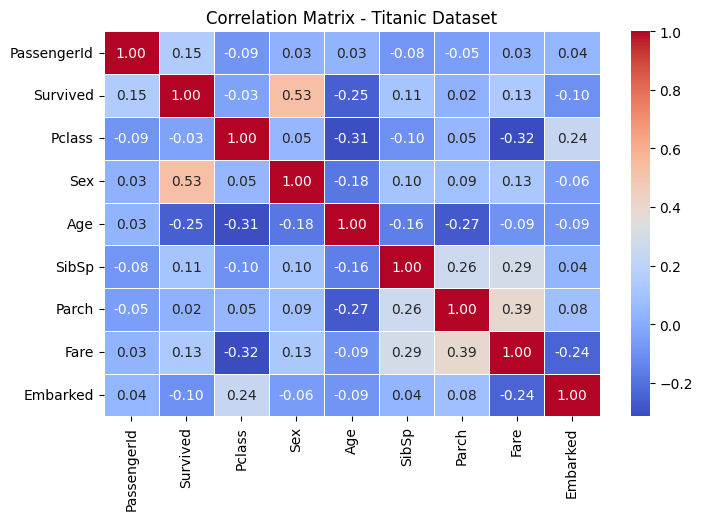

Feature Correlation with Survived:

Survived       1.000000
Sex            0.532418
PassengerId    0.148495
Fare           0.134241
SibSp          0.106346
Parch          0.023582
Pclass        -0.034542
Embarked      -0.100943
Age           -0.254085
Name: Survived, dtype: float64


In [ ]:
#df = pd.read_csv("/content/Titanic-Dataset.csv")

# Convert non-numeric features to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Male=0, Female=1
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})  # Convert Embarked values

# Remove missing values (NaN)
df = df.dropna()

# Select numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Titanic Dataset")
plt.show()

# Check the correlation of features with the target variable (Survived)
print("Feature Correlation with Survived:\n")
print(corr_matrix["Survived"].sort_values(ascending=False))


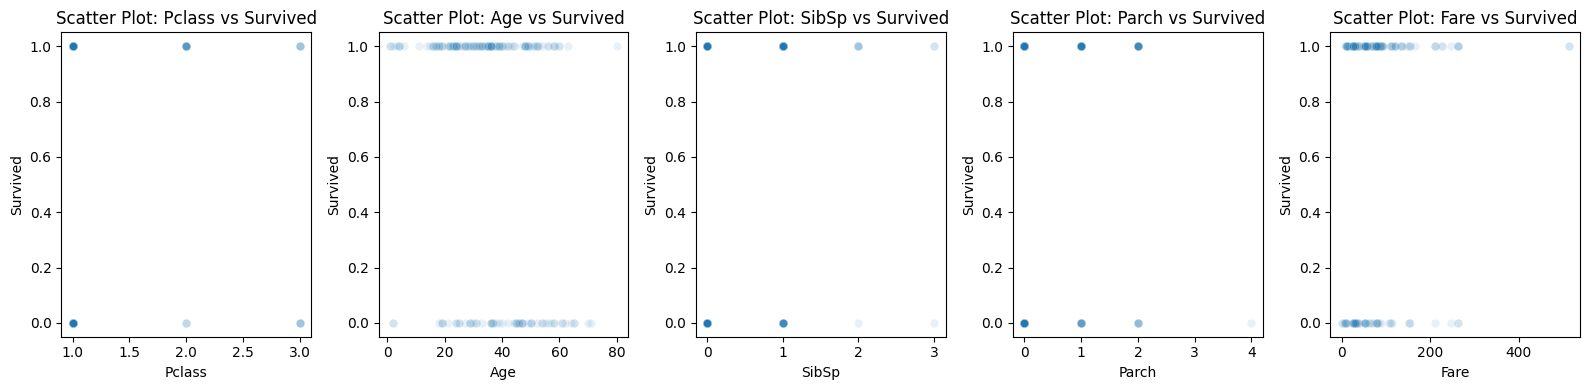

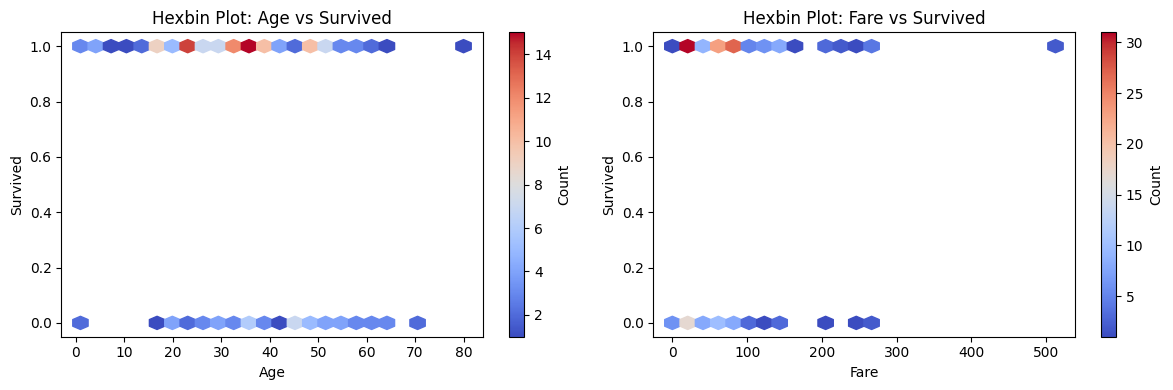

In [ ]:
#df = pd.read_csv("/content/Titanic-Dataset.csv")

# Drop missing values (NaN) for numeric features
df = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].dropna()

# Plot scatter plots
plt.figure(figsize=(16, 4))
for i, feature in enumerate(["Pclass", "Age", "SibSp", "Parch", "Fare"]):
    plt.subplot(1, 5, i+1)
    sns.scatterplot(data=df, x=feature, y="Survived", alpha=0.1)
    plt.title(f"Scatter Plot: {feature} vs Survived")
plt.tight_layout()
plt.show()

# Plot hexbin plots for continuous features only (age, fare)
plt.figure(figsize=(12, 4))
for i, feature in enumerate(["Age", "Fare"]):
    plt.subplot(1, 2, i+1)
    plt.hexbin(df[feature], df["Survived"], gridsize=25, cmap="coolwarm", mincnt=1)
    plt.colorbar(label="Count")
    plt.xlabel(feature)
    plt.ylabel("Survived")
    plt.title(f"Hexbin Plot: {feature} vs Survived")
plt.tight_layout()
plt.show()


Average fare paid by survivors and non-survivors:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


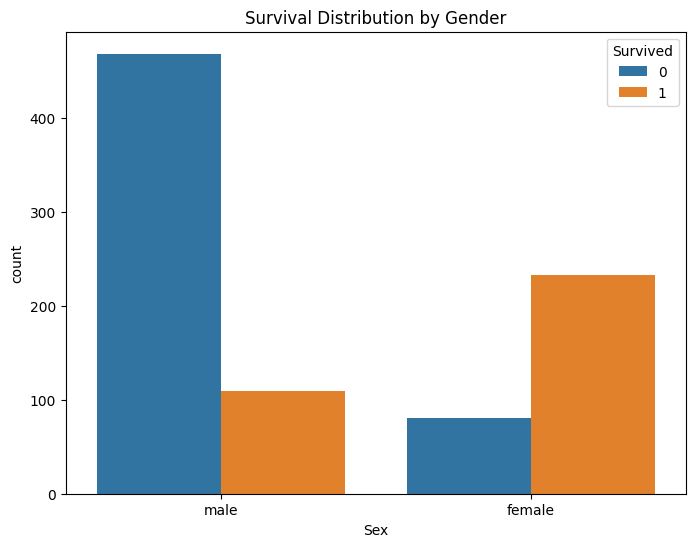

Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

# 1. Scatter plot: Distribution of survivors by age and fare
fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                 color_continuous_scale="bluered",  # Change color scheme
                 title="Distribution of Survivors by Age and Fare")

fig.show()

# Analyze the relationship between fare and survival
survived_by_fare = df.groupby("Survived")["Fare"].mean()
print("Average fare paid by survivors and non-survivors:")
print(survived_by_fare)

# 2. Count plot: Survival distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Distribution by Gender")
plt.show()

# Calculate survival rate by gender
survival_rate_by_sex = df.groupby("Sex")["Survived"].mean() * 100
print("Survival rate by gender:")
print(survival_rate_by_sex)

##1.2

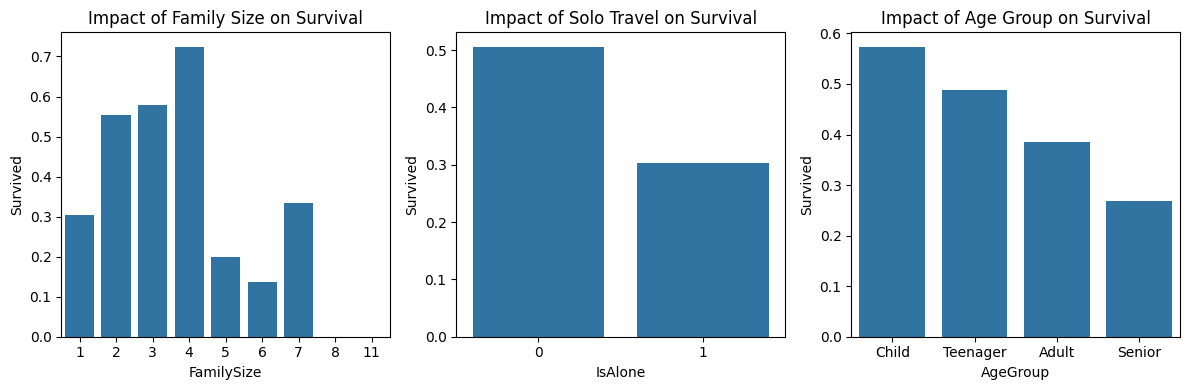

Survival rate by family size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Survival rate for solo and non-solo travelers:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Survival rate by age group:
AgeGroup
Child       0.573529
Teenager    0.488889
Adult       0.386087
Senior      0.269231
Name: Survived, dtype: float64


In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

# 1. Calculate family size and analyze its impact on survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Calculate family size

# 2. Analyze solo travel and its impact on survival
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1  # Identify solo travelers

# 3. Age group categorization and analysis of its impact on survival
bins = [0, 12, 18, 60, 100]  # Age group bins
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  # Create age groups

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Family size vs. survival (no error bars)
sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[0], errorbar=None)
axes[0].set_title('Impact of Family Size on Survival')

# Plot 2: Solo travel vs. survival (no error bars)
sns.barplot(x='IsAlone', y='Survived', data=df, ax=axes[1], errorbar=None)
axes[1].set_title('Impact of Solo Travel on Survival')

# Plot 3: Age group vs. survival (no error bars)
sns.barplot(x='AgeGroup', y='Survived', data=df, ax=axes[2], errorbar=None)
axes[2].set_title('Impact of Age Group on Survival')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

# Analyze the relationships
family_survival = df.groupby('FamilySize')['Survived'].mean()
print("Survival rate by family size:")
print(family_survival)

alone_survival = df.groupby('IsAlone')['Survived'].mean()
print("\nSurvival rate for solo and non-solo travelers:")
print(alone_survival)

age_group_survival = df.groupby('AgeGroup', observed=True)['Survived'].mean()
print("\nSurvival rate by age group:")
print(age_group_survival)

##بخش دوم

##بخش سوم

#پرسش دوم

##2.1

In [ ]:
#https://drive.google.com/file/d/1Ua39iZlbqoXxqjcKAG6MiHXPvG4iNYBo/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Ua39iZlbqoXxqjcKAG6MiHXPvG4iNYBo

Downloading...
From: https://drive.google.com/uc?id=1Ua39iZlbqoXxqjcKAG6MiHXPvG4iNYBo
To: /content/mp1_lr_dataset_ai4032.csv
100% 40.8k/40.8k [00:00<00:00, 49.0MB/s]


##2.1.1

In [ ]:
# Read the CSV file and convert it into a DataFrame
df = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")

# Print the first 5 rows of the DataFrame in the terminal
print(df.head())


      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  ...   7130   
2 -3959 -4058 -4131 -4033 -4009 -3941 -3996 -4071 -3971 -4021  ...   -254   

    1992   1993   1994   1995   1996   1997   1998   1999   2000  
0  21692  21697  21705  21711  21729  21742  21746  21763  21777  
1   7150   7117   7023   7064      0   7027   6929   6954   6867  
2   -296   -303      0   -327   -274   -358   -278   -346   -299  

[3 rows x 2000 columns]


##2.1.3

In [ ]:
# Read the CSV file and specify the header row
#df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Convert data to a column array
column_array = df.values.reshape(-1, 1)

# Print the column array
#print(column_array)

# Convert the array to a DataFrame
df = pd.DataFrame(column_array, columns=['Column'])

# Display the DataFrame
print(df)

      Column
0       13.0
1       29.0
2       44.0
3       55.0
4       61.0
...      ...
5995  -274.0
5996  -358.0
5997  -278.0
5998  -346.0
5999  -299.0

[6000 rows x 1 columns]


##2.1.4

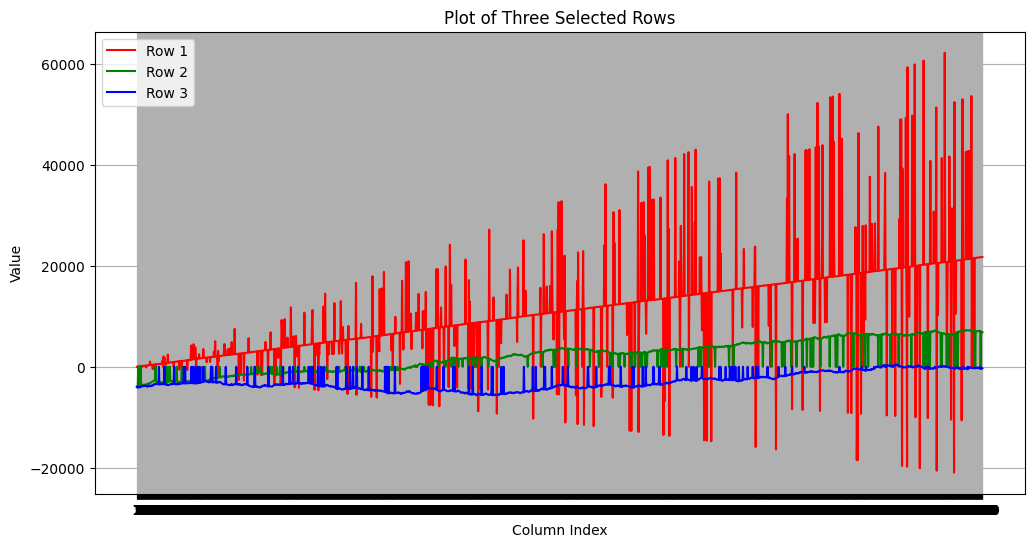

In [ ]:
df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Select three different rows (e.g., rows 1, 2, and 3)
row1 = df.iloc[0]
row2 = df.iloc[1]
row3 = df.iloc[2]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each row with a different color
plt.plot(row1, color='red', label='Row 1')
plt.plot(row2, color='green', label='Row 2')
plt.plot(row3, color='blue', label='Row 3')

# Add a title and axis labels
plt.title('Plot of Three Selected Rows')
plt.xlabel('Column Index')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


##2.2

In [ ]:
from scipy import stats

# فرض: داده‌ها قبلاً لود شدن و df موجوده
# مثلا:
# df = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")

DATA = 0  # ردیف مورد نظر برای تحلیل (مثلاً ردیف اول)
z_threshold = 3  # آستانه Z برای حذف مقادیر پرت

# مرحله 1: محاسبه Z-score برای ردیف انتخاب‌شده
row_data = df.iloc[DATA].values
z_scores = stats.zscore(row_data)

# مرحله 2: محاسبه آستانه‌های عددی واقعی
mean = np.mean(row_data)
std = np.std(row_data)

lower_threshold = mean - z_threshold * std
upper_threshold = mean + z_threshold * std

# مرحله 3: اعمال پاک‌سازی با Z-score
df_z_cleaned = row_data[np.abs(z_scores) < z_threshold]

# مرحله 4: چاپ آستانه‌ها و خلاصه
print(f"📉 Lower numeric threshold (Z<{z_threshold}): {lower_threshold}")
print(f"📈 Upper numeric threshold (Z<{z_threshold}): {upper_threshold}")
print(f"✅ Cleaned data length: {len(df_z_cleaned)} / Original: {len(row_data)}")


📉 Lower numeric threshold (Z<3): -17643.491233311834
📈 Upper numeric threshold (Z<3): 39658.35023331183
✅ Cleaned data length: 1953 / Original: 2000


In [ ]:
# Define a function to remove outliers from rows in the DataFrame
def remove_outliers_from_rows(data, lower_threshold=-17643.49, upper_threshold=39658.35):
    cleaned_rows = []  # Initialize a list to store rows without outliers

    # Iterate through each row in the DataFrame
    for _, row in data.iterrows():
        # Filter values within the specified thresholds
        cleaned_row = row[(row >= lower_threshold) & (row <= upper_threshold)]
        cleaned_rows.append(cleaned_row)  # Add the cleaned row to the list

    # Combine all cleaned rows into a new DataFrame and transpose the result
    cleaned_data = pd.concat(cleaned_rows, axis=1).transpose()
    return cleaned_data  # Return the cleaned DataFrame

# Read the CSV file (assuming it has a header row)
df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Apply the function to remove outliers from the data
cleaned_data_nan = remove_outliers_from_rows(df)

In [ ]:
# Print the resulting cleaned data
print(cleaned_data_nan)

        1       2       3       4       5       6       7       8       9  \
0    13.0    29.0    44.0    55.0    61.0    72.0   200.0    96.0   112.0   
1 -3980.0 -3883.0 -3832.0     0.0 -3839.0 -3788.0 -3695.0 -3663.0 -3669.0   
2 -3959.0 -4058.0 -4131.0 -4033.0 -4009.0 -3941.0 -3996.0 -4071.0 -3971.0   

       10  ...  1904    1911    1922    1928    1934    1953    1961    1965  \
0   120.0  ...   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     0.0  ...   0.0  6536.0  6400.0  6345.0  6485.0  6968.0  7227.0  7251.0   
2 -4021.0  ... -51.0    70.0  -163.0  -166.0  -349.0  -396.0  -271.0     0.0   

     1969    1974  
0     NaN     NaN  
1  7252.0  7210.0  
2  -196.0  -122.0  

[3 rows x 2000 columns]


In [ ]:
def replace_outliers_with_neighbors_mean_rows(data, lower_threshold=-17643.49, upper_threshold=39658.35):
    cleaned_data = data.copy()  # Create a copy of the input data to modify
    for col in cleaned_data.columns:  # Process each column
        cleaned_data[col] = cleaned_data[col].astype(float)  # Convert data to float type
        for j in range(len(cleaned_data)):  # Process each row
            if cleaned_data.loc[j, col] < lower_threshold or cleaned_data.loc[j, col] > upper_threshold:
                # Identify outlier value
                neighbors = []
                if j > 0:
                    neighbors.append(cleaned_data.loc[j - 1, col])  # Previous value
                if j < len(cleaned_data) - 1:
                    neighbors.append(cleaned_data.loc[j + 1, col])  # Next value

                if neighbors:  # If there are neighbors
                    mean_neighbors = round(sum(neighbors) / len(neighbors))  # Calculate mean of neighbors
                else:
                    mean_neighbors = cleaned_data[col].mean()  # Otherwise, use the column mean

                # Ensure the value stays within the threshold limits
                cleaned_data.loc[j, col] = max(lower_threshold, min(mean_neighbors, upper_threshold))

    return cleaned_data  # Return the cleaned dataset

# Read data from CSV file
df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Apply the function to clean data
cleaned_data_mean = replace_outliers_with_neighbors_mean_rows(df)

# Get the maximum value of the cleaned dataset
overall_max = cleaned_data_mean.values.max()
print("\n📌 Maximum value of the cleaned dataset:", overall_max)


📌 Maximum value of the cleaned dataset: 39633.0


In [ ]:
print(cleaned_data_mean)
print(df)

        1       2       3       4       5       6       7       8       9  \
0    13.0    29.0    44.0    55.0    61.0    72.0   200.0    96.0   112.0   
1 -3980.0 -3883.0 -3832.0     0.0 -3839.0 -3788.0 -3695.0 -3663.0 -3669.0   
2 -3959.0 -4058.0 -4131.0 -4033.0 -4009.0 -3941.0 -3996.0 -4071.0 -3971.0   

       10  ...     1991     1992     1993     1994     1995     1996     1997  \
0   120.0  ...  21680.0  21692.0  21697.0  21705.0  21711.0  21729.0  21742.0   
1     0.0  ...   7130.0   7150.0   7117.0   7023.0   7064.0      0.0   7027.0   
2 -4021.0  ...   -254.0   -296.0   -303.0      0.0   -327.0   -274.0   -358.0   

      1998     1999     2000  
0  21746.0  21763.0  21777.0  
1   6929.0   6954.0   6867.0  
2   -278.0   -346.0   -299.0  

[3 rows x 2000 columns]
      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  

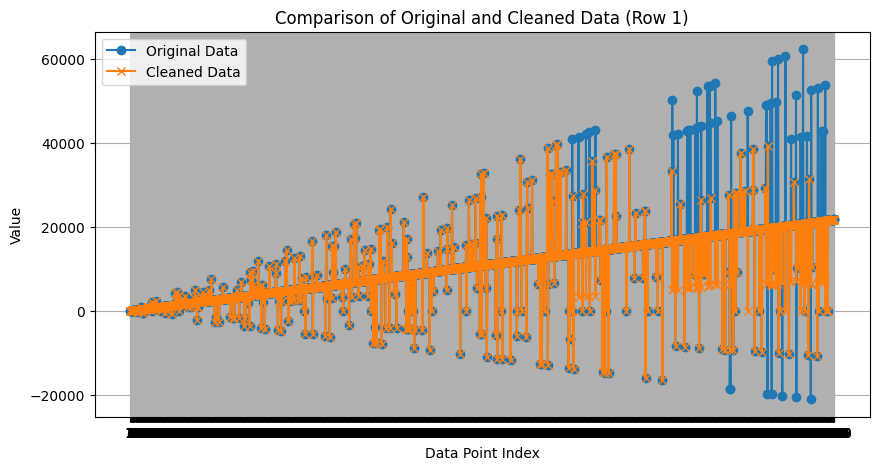

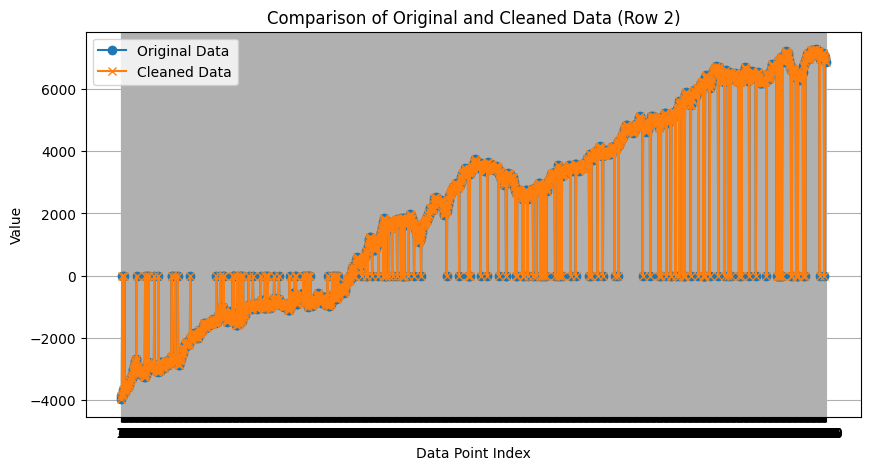

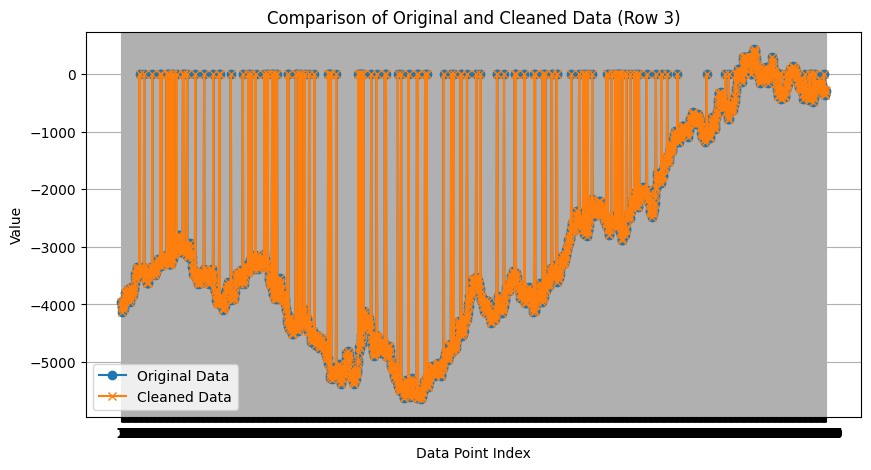

In [ ]:
#df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Clean the data
#cleaned_data = replace_outliers_with_neighbors_mean_rows(df)

# Plot for comparison
plt.figure(figsize=(10, 5))

# Plot original data
plt.plot(df.iloc[0], label='Original Data', marker='o')

# Plot cleaned data
plt.plot(cleaned_data_mean.iloc[0], label='Cleaned Data', marker='x')

plt.title('Comparison of Original and Cleaned Data (Row 1)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
###################################################################
# Plot for comparison
plt.figure(figsize=(10, 5))

# Plot original data
plt.plot(df.iloc[1], label='Original Data', marker='o')

# Plot cleaned data
plt.plot(cleaned_data_mean.iloc[1], label='Cleaned Data', marker='x')

plt.title('Comparison of Original and Cleaned Data (Row 2)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
###################################################################
# Plot for comparison
plt.figure(figsize=(10, 5))

# Plot original data
plt.plot(df.iloc[2], label='Original Data', marker='o')

# Plot cleaned data
plt.plot(cleaned_data_mean.iloc[2], label='Cleaned Data', marker='x')

plt.title('Comparison of Original and Cleaned Data (Row 3)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# پیدا کردن مقدار ماکزیمم برای هر ردیف در داده‌های اصلی
max_original = df.max(axis=1)

# پیدا کردن مقدار ماکزیمم برای هر ردیف در داده‌های پاک‌سازی‌شده
max_cleaned = cleaned_data_mean.max(axis=1)

# نمایش نتایج
print("Maximum values for each row in Original Data:")
print(max_original)

print("\nMaximum values for each row in Cleaned Data:")
print(max_cleaned)


Maximum values for each row in Original Data:
0    62274.0
1     7285.0
2      432.0
dtype: float64

Maximum values for each row in Cleaned Data:
0    39633.0
1     7285.0
2      432.0
dtype: float64


##2.3.1 & 2.4


In [ ]:
cleaned_data_mean

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,13.0,29.0,44.0,55.0,61.0,72.0,200.0,96.0,112.0,120.0,...,21680.0,21692.0,21697.0,21705.0,21711.0,21729.0,21742.0,21746.0,21763.0,21777.0
1,-3980.0,-3883.0,-3832.0,0.0,-3839.0,-3788.0,-3695.0,-3663.0,-3669.0,0.0,...,7130.0,7150.0,7117.0,7023.0,7064.0,0.0,7027.0,6929.0,6954.0,6867.0
2,-3959.0,-4058.0,-4131.0,-4033.0,-4009.0,-3941.0,-3996.0,-4071.0,-3971.0,-4021.0,...,-254.0,-296.0,-303.0,0.0,-327.0,-274.0,-358.0,-278.0,-346.0,-299.0


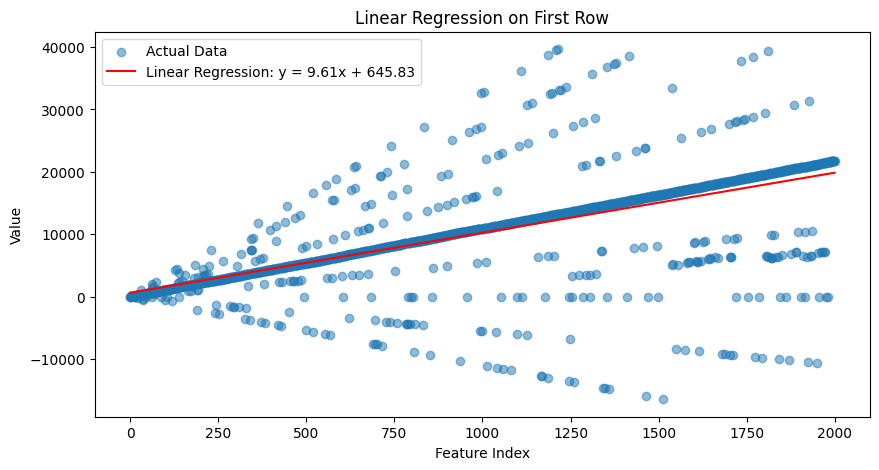

✅ Model trained successfully: y = 9.6145x + 645.8331


In [ ]:
# Use the cleaned data
first_row = cleaned_data_mean.iloc[0, :].values  # Extract first row as NumPy array

# Generate X values (assuming sequential indices as features)
X = np.arange(len(first_row)).reshape(-1, 1)  # Reshape to column vector
Y = first_row.reshape(-1, 1)  # Reshape target values

# Compute parameters using Normal Equation: θ = (X^T * X)^(-1) * X^T * Y
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of ones)
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y)  # Compute theta

# Extract intercept and slope
intercept, slope = theta[0, 0], theta[1, 0]

# Predict Y values
Y_pred = X_bias.dot(theta)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

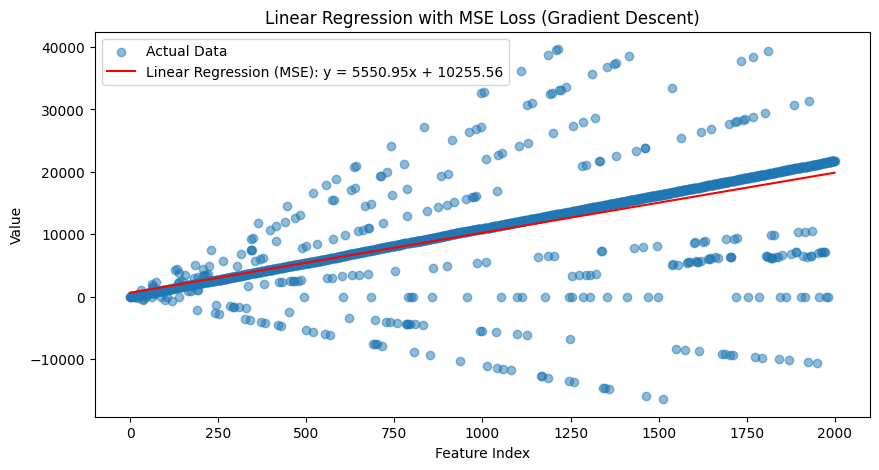

✅ Model trained with Gradient Descent:
Intercept (θ₀) = 10255.5592
Slope (θ₁)     = 5550.9527


In [ ]:
#using gradient descent method for row1
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare data
first_row_GD = cleaned_data_mean.iloc[0, :].values  # First row as NumPy array
X = np.arange(len(first_row_GD)).reshape(-1, 1)
Y = first_row_GD.reshape(-1, 1)

# Normalize X for better gradient descent stability (optional but helpful)
X_norm = (X - X.mean()) / X.std()

# Add bias term to X
X_bias = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# Step 2: Initialize weights
theta = np.random.randn(2, 1)  # [bias, weight]

# Step 3: Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X_bias)

# Step 4: Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_bias.T.dot(X_bias.dot(theta) - Y)
    theta = theta - learning_rate * gradients

# Extract parameters
intercept, slope = theta[0, 0], theta[1, 0]
Y_pred = X_bias.dot(theta)

# Step 5: Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression (MSE): y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression with MSE Loss (Gradient Descent)")
plt.show()

# Step 6: Final output
print(f"✅ Model trained with Gradient Descent:")
print(f"Intercept (θ₀) = {intercept:.4f}")
print(f"Slope (θ₁)     = {slope:.4f}")


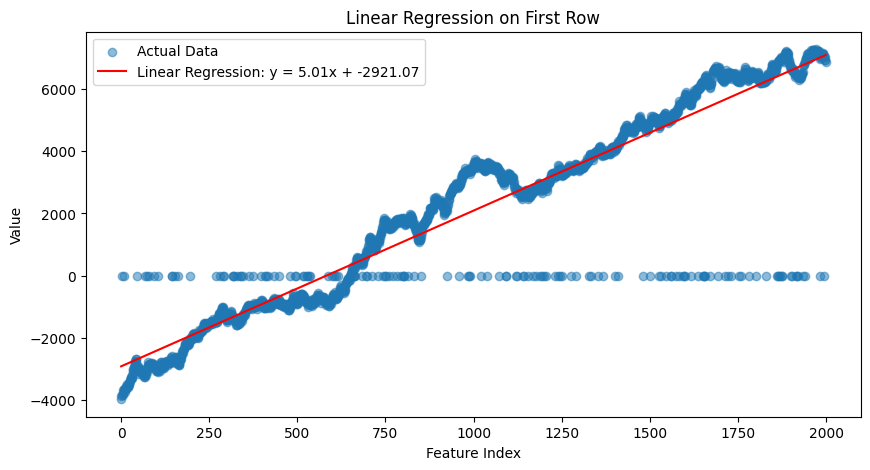

✅ Model trained successfully: y = 5.0120x + -2921.0659


In [ ]:
# Use the cleaned data
second_row = cleaned_data_mean.iloc[1, :].values  # Extract second row as NumPy array

# Generate X values (assuming sequential indices as features)
X = np.arange(len(second_row)).reshape(-1, 1)  # Reshape to column vector
Y = second_row.reshape(-1, 1)  # Reshape target values

# Compute parameters using Normal Equation: θ = (X^T * X)^(-1) * X^T * Y
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of ones)
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y)  # Compute theta

# Extract intercept and slope
intercept, slope = theta[0, 0], theta[1, 0]

# Predict Y values
Y_pred = X_bias.dot(theta)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")


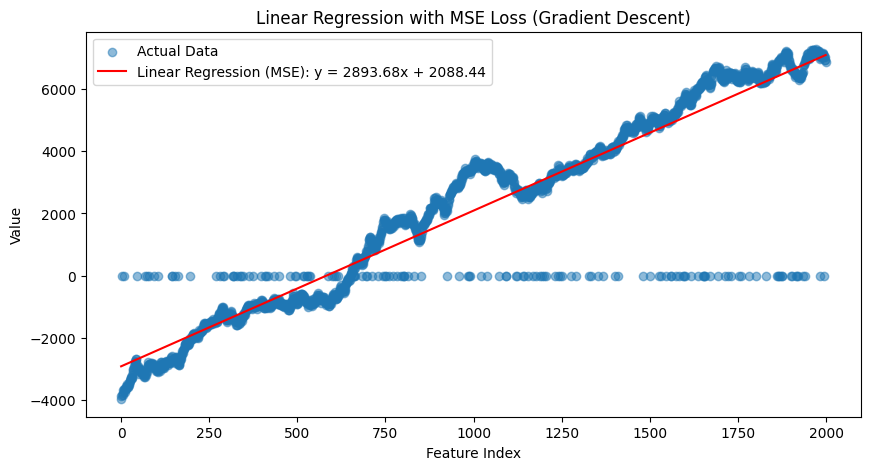

✅ Model trained with Gradient Descent:
Intercept (θ₀) = 2088.4355
Slope (θ₁)     = 2893.6835


In [ ]:
#using gradient descent method for row2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare data
second_row_GD = cleaned_data_mean.iloc[1, :].values  # First row as NumPy array
X = np.arange(len(second_row_GD)).reshape(-1, 1)
Y = second_row_GD.reshape(-1, 1)

# Normalize X for better gradient descent stability (optional but helpful)
X_norm = (X - X.mean()) / X.std()

# Add bias term to X
X_bias = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# Step 2: Initialize weights
theta = np.random.randn(2, 1)  # [bias, weight]

# Step 3: Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X_bias)

# Step 4: Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_bias.T.dot(X_bias.dot(theta) - Y)
    theta = theta - learning_rate * gradients

# Extract parameters
intercept, slope = theta[0, 0], theta[1, 0]
Y_pred = X_bias.dot(theta)

# Step 5: Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression (MSE): y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression with MSE Loss (Gradient Descent)")
plt.show()

# Step 6: Final output
print(f"✅ Model trained with Gradient Descent:")
print(f"Intercept (θ₀) = {intercept:.4f}")
print(f"Slope (θ₁)     = {slope:.4f}")


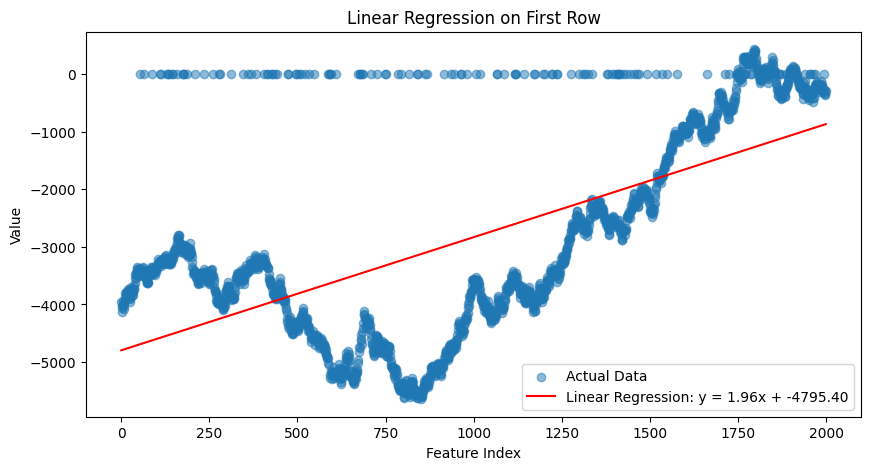

✅ Model trained successfully: y = 1.9641x + -4795.4008


In [ ]:
# Using LS for Third row
# Use the cleaned data
third_row = cleaned_data_mean.iloc[2, :].values  # Extract third row as NumPy array

# Generate X values (assuming sequential indices as features)
X = np.arange(len(third_row)).reshape(-1, 1)  # Reshape to column vector
Y = third_row.reshape(-1, 1)  # Reshape target values

# Compute parameters using Normal Equation: θ = (X^T * X)^(-1) * X^T * Y
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of ones)
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y)  # Compute theta

# Extract intercept and slope
intercept, slope = theta[0, 0], theta[1, 0]

# Predict Y values
Y_pred = X_bias.dot(theta)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

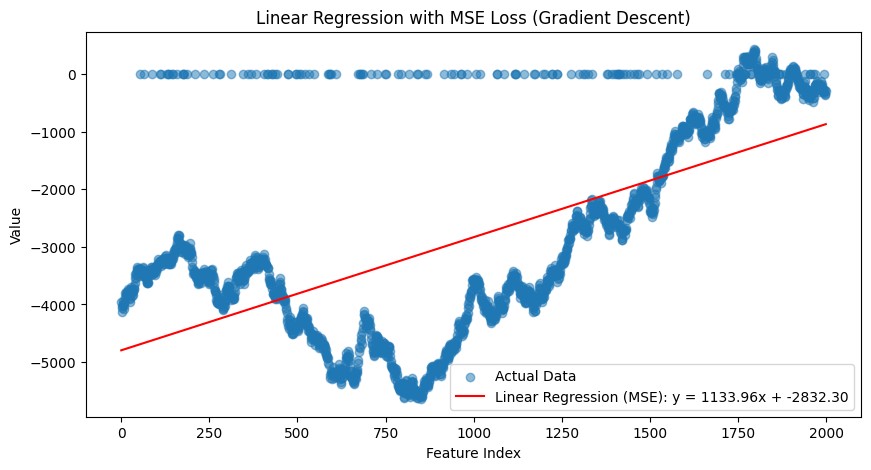

✅ Model trained with Gradient Descent:
Intercept (θ₀) = -2832.2980
Slope (θ₁)     = 1133.9648


In [ ]:
#using gradient descent method for row3
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare data
Third_row_GD = cleaned_data_mean.iloc[2, :].values  # First row as NumPy array
X = np.arange(len(Third_row_GD)).reshape(-1, 1)
Y = Third_row_GD.reshape(-1, 1)

# Normalize X for better gradient descent stability (optional but helpful)
X_norm = (X - X.mean()) / X.std()

# Add bias term to X
X_bias = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# Step 2: Initialize weights
theta = np.random.randn(2, 1)  # [bias, weight]

# Step 3: Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X_bias)

# Step 4: Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_bias.T.dot(X_bias.dot(theta) - Y)
    theta = theta - learning_rate * gradients

# Extract parameters
intercept, slope = theta[0, 0], theta[1, 0]
Y_pred = X_bias.dot(theta)

# Step 5: Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label=f"Linear Regression (MSE): y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression with MSE Loss (Gradient Descent)")
plt.show()

# Step 6: Final output
print(f"✅ Model trained with Gradient Descent:")
print(f"Intercept (θ₀) = {intercept:.4f}")
print(f"Slope (θ₁)     = {slope:.4f}")


##2.3.2

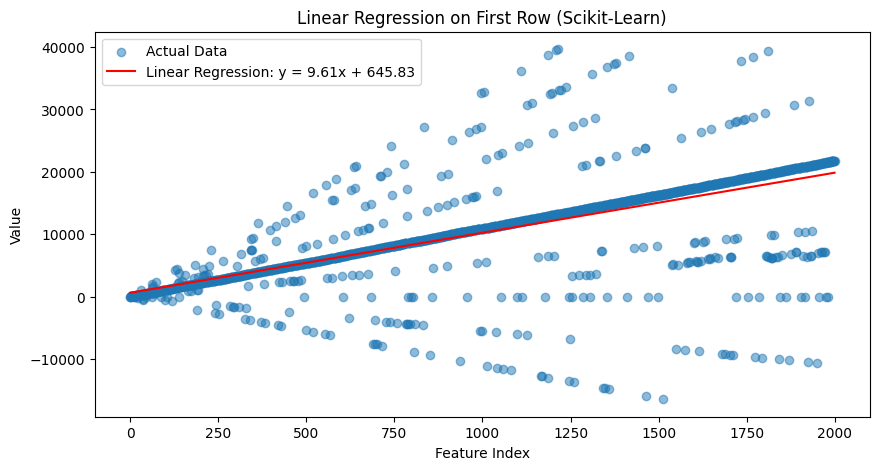

✅ Model trained successfully: y = 9.6145x + 645.8331


In [ ]:
from sklearn.linear_model import LinearRegression
# Use the cleaned data
first_row = cleaned_data_mean.iloc[0, :].values  # Extract first row as NumPy array

# Generate X values (column indices as features)
X_1 = np.arange(len(first_row)).reshape(-1, 1)  # Reshape to column vector
Y_1 = first_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_1, Y_1)

# Get predictions
Y_1_pred = model.predict(X_1)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_1, Y_1, label="Actual Data", alpha=0.5)
plt.plot(X_1, Y_1_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

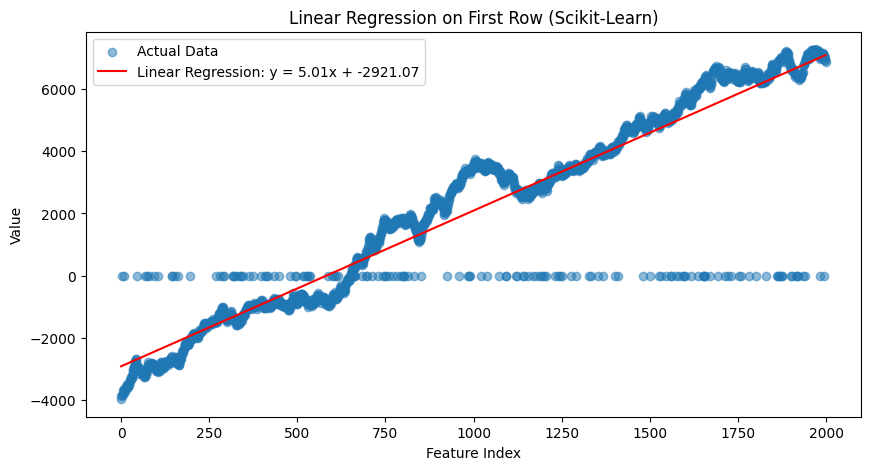

✅ Model trained successfully: y = 5.0120x + -2921.0659


In [ ]:

from sklearn.linear_model import LinearRegression
# Use the cleaned data
second_row = cleaned_data_mean.iloc[1, :].values  # Extract second row as NumPy array

# Generate X values (column indices as features)
X_2 = np.arange(len(second_row)).reshape(-1, 1)  # Reshape to column vector
Y_2 = second_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_2, Y_2)

# Get predictions
Y_2_pred = model.predict(X_2)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_2, Y_2, label="Actual Data", alpha=0.5)
plt.plot(X_2, Y_2_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

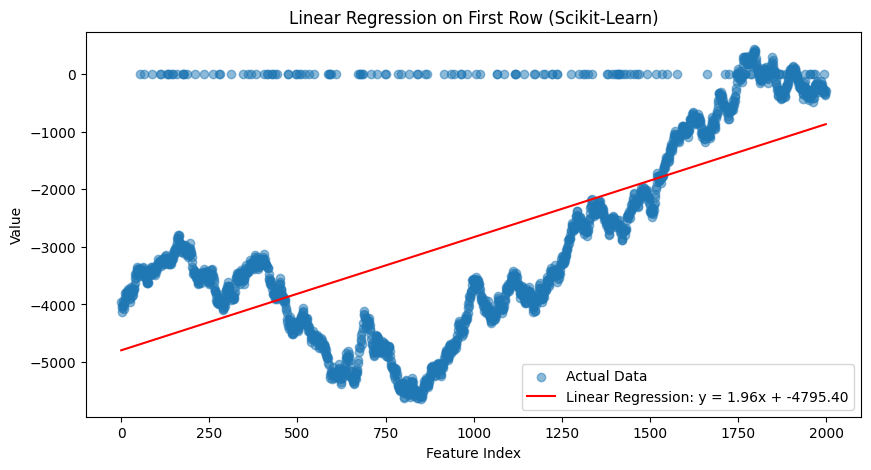

✅ Model trained successfully: y = 1.9641x + -4795.4008


In [ ]:
from sklearn.linear_model import LinearRegression
# Use the cleaned data
third_row = cleaned_data_mean.iloc[2, :].values  # Extract third row as NumPy array

# Generate X values (column indices as features)
X_3 = np.arange(len(third_row)).reshape(-1, 1)  # Reshape to column vector
Y_3 = third_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_3, Y_3)

# Get predictions
Y_3_pred = model.predict(X_3)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_3, Y_3, label="Actual Data", alpha=0.5)
plt.plot(X_3, Y_3_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

In [ ]:
Y_3_pred

array([[-4795.40082609],
       [-4793.43674122],
       [-4791.47265635],
       ...,
       [ -873.12334365],
       [ -871.15925878],
       [ -869.19517391]])

In [ ]:
Y_3

array([[-3959.],
       [-4058.],
       [-4131.],
       ...,
       [ -278.],
       [ -346.],
       [ -299.]])

##تغییر آستانه

In [ ]:
def find_outlier_threshold_boxplot(data):
    # Draw a boxplot
    sns.boxplot(x=data)
    plt.show()

    # Calculate quartiles and interquartile range (IQR)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    # Calculate thresholds
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    return lower_threshold, upper_threshold

# Read the CSV file
#df = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")

# Convert DataFrame to a one-dimensional NumPy array
column_array = df.values.flatten()

# Convert NumPy array to a pandas series
column_series = pd.Series(column_array)

lower, upper = find_outlier_threshold_boxplot(column_series)
print(f"Lower threshold: {lower}")
print(f"Upper threshold: {upper}")

NameError: name 'df' is not defined

In [ ]:
def replace_outliers_with_neighbors_mean_rows(data, lower_threshold=-20680.25, upper_threshold=41702.25):
    cleaned_data = data.copy()  # Create a copy of the input data to modify
    for col in cleaned_data.columns:  # Process each column
        cleaned_data[col] = cleaned_data[col].astype(float)  # Convert data to float type
        for j in range(len(cleaned_data)):  # Process each row
            if cleaned_data.loc[j, col] < lower_threshold or cleaned_data.loc[j, col] > upper_threshold:
                # Identify outlier value
                neighbors = []
                if j > 0:
                    neighbors.append(cleaned_data.loc[j - 1, col])  # Previous value
                if j < len(cleaned_data) - 1:
                    neighbors.append(cleaned_data.loc[j + 1, col])  # Next value

                if neighbors:  # If there are neighbors
                    mean_neighbors = round(sum(neighbors) / len(neighbors))  # Calculate mean of neighbors
                else:
                    mean_neighbors = cleaned_data[col].mean()  # Otherwise, use the column mean

                # Ensure the value stays within the threshold limits
                cleaned_data.loc[j, col] = max(lower_threshold, min(mean_neighbors, upper_threshold))

    return cleaned_data  # Return the cleaned dataset

# Read data from CSV file
df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')

# Apply the function to clean data
cleaned_data_mean = replace_outliers_with_neighbors_mean_rows(df)

# Get the maximum value of the cleaned dataset
overall_max = cleaned_data_mean.values.max()
print("\n📌 Maximum value of the cleaned dataset:", overall_max)


📌 Maximum value of the cleaned dataset: 41412.0


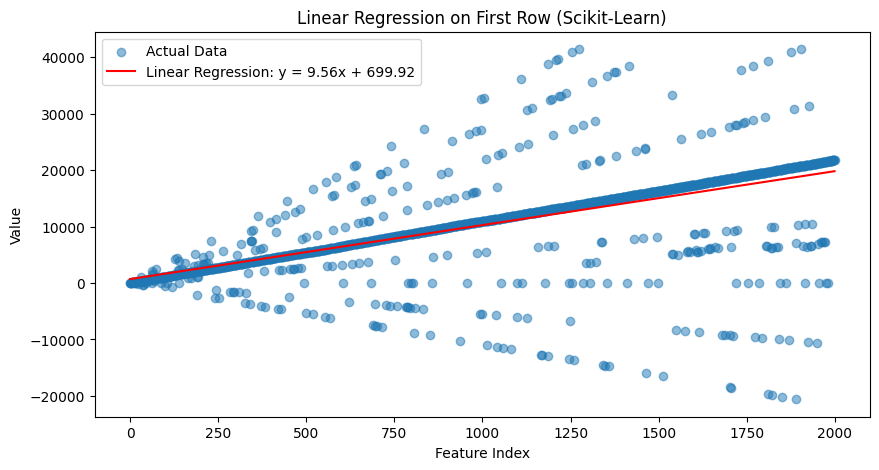

✅ Model trained successfully: y = 9.5577x + 699.9203


In [ ]:
from sklearn.linear_model import LinearRegression
# Use the cleaned data
first_row = cleaned_data_mean.iloc[0, :].values  # Extract first row as NumPy array

# Generate X values (column indices as features)
X_1 = np.arange(len(first_row)).reshape(-1, 1)  # Reshape to column vector
Y_1 = first_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_1, Y_1)

# Get predictions
Y_1_pred = model.predict(X_1)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_1, Y_1, label="Actual Data", alpha=0.5)
plt.plot(X_1, Y_1_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

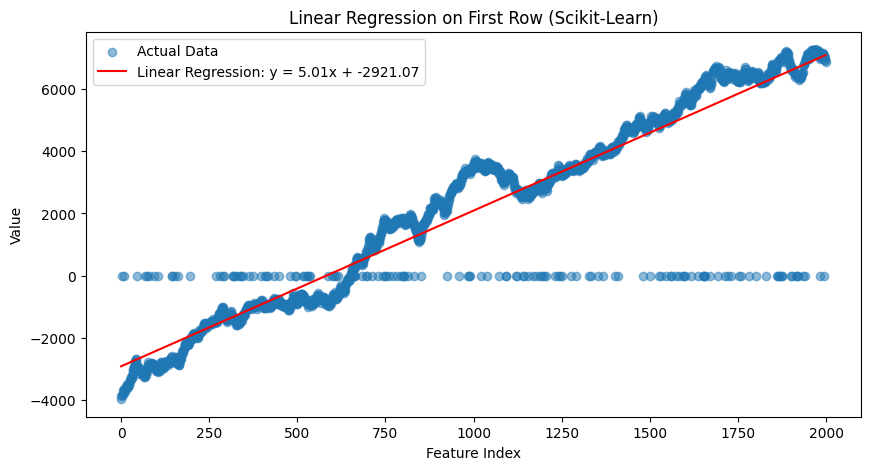

✅ Model trained successfully: y = 5.0120x + -2921.0659


In [ ]:

from sklearn.linear_model import LinearRegression
# Use the cleaned data
second_row = cleaned_data_mean.iloc[1, :].values  # Extract second row as NumPy array

# Generate X values (column indices as features)
X_2 = np.arange(len(second_row)).reshape(-1, 1)  # Reshape to column vector
Y_2 = second_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_2, Y_2)

# Get predictions
Y_2_pred = model.predict(X_2)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_2, Y_2, label="Actual Data", alpha=0.5)
plt.plot(X_2, Y_2_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

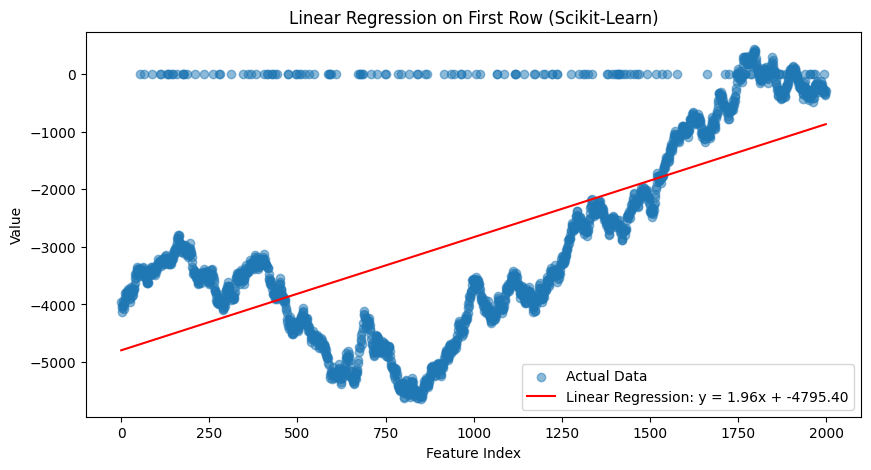

✅ Model trained successfully: y = 1.9641x + -4795.4008


In [ ]:
from sklearn.linear_model import LinearRegression
# Use the cleaned data
third_row = cleaned_data_mean.iloc[2, :].values  # Extract third row as NumPy array

# Generate X values (column indices as features)
X_3 = np.arange(len(third_row)).reshape(-1, 1)  # Reshape to column vector
Y_3 = third_row.reshape(-1, 1)  # Reshape target values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_3, Y_3)

# Get predictions
Y_3_pred = model.predict(X_3)

# Extract model parameters
slope = model.coef_[0, 0]
intercept = model.intercept_[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_3, Y_3, label="Actual Data", alpha=0.5)
plt.plot(X_3, Y_3_pred, color='red', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.title("Linear Regression on First Row (Scikit-Learn)")
plt.show()

print(f"✅ Model trained successfully: y = {slope:.4f}x + {intercept:.4f}")

##2.3.3

In [ ]:
data = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")

In [ ]:
data

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,13,29,44,55,61,72,200,96,112,120,...,21680,21692,21697,21705,21711,21729,21742,21746,21763,21777
1,-3980,-3883,-3832,0,-3839,-3788,-3695,-3663,-3669,0,...,7130,7150,7117,7023,7064,0,7027,6929,6954,6867
2,-3959,-4058,-4131,-4033,-4009,-3941,-3996,-4071,-3971,-4021,...,-254,-296,-303,0,-327,-274,-358,-278,-346,-299


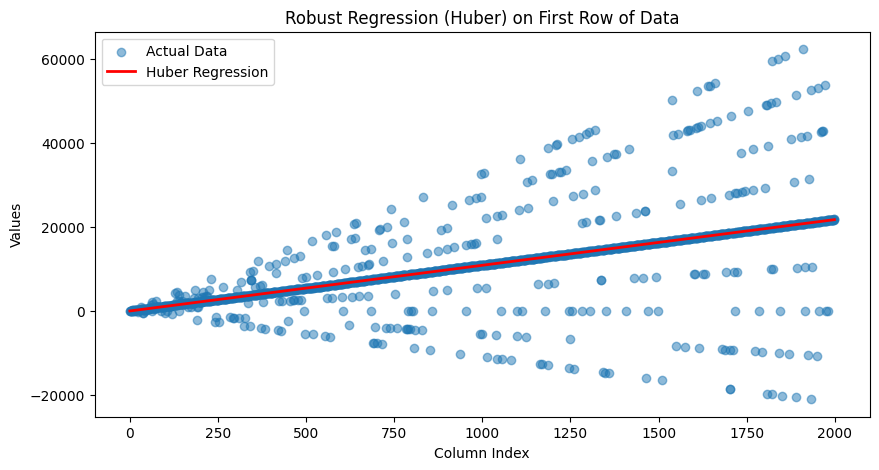

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
# انتخاب سطر اول
X = np.arange(data.shape[1]).reshape(-1, 1)  # شاخص ستون‌ها به عنوان X
Y = data.iloc[0].values.reshape(-1, 1)  # مقادیر سطر اول به عنوان Y

# حذف مقادیر NaN (در صورت وجود)
mask = ~np.isnan(Y.squeeze())
X, Y = X[mask], Y[mask]

# ایجاد و آموزش مدل HuberRegressor
huber = HuberRegressor()
huber.fit(X, Y.ravel())
Y_pred = huber.predict(X)

# رسم نتایج
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label="Huber Regression", linewidth=2)
plt.xlabel("Column Index")
plt.ylabel("Values")
plt.legend()
plt.title("Robust Regression (Huber) on First Row of Data")
plt.show()

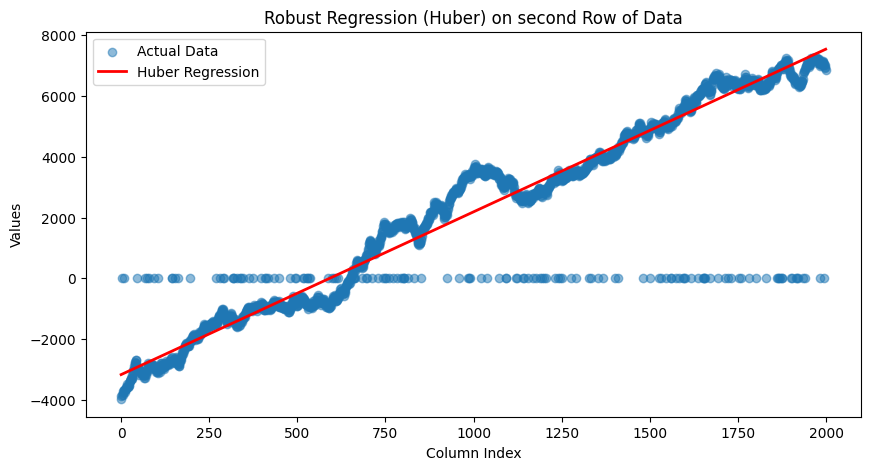

In [ ]:
# انتخاب سطر اول
X = np.arange(data.shape[1]).reshape(-1, 1)  # شاخص ستون‌ها به عنوان X
Y = data.iloc[1].values.reshape(-1, 1)  # مقادیر سطر اول به عنوان Y

# حذف مقادیر NaN (در صورت وجود)
mask = ~np.isnan(Y.squeeze())
X, Y = X[mask], Y[mask]

# ایجاد و آموزش مدل HuberRegressor
huber = HuberRegressor()
huber.fit(X, Y.ravel())
Y_pred = huber.predict(X)

# رسم نتایج
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label="Huber Regression", linewidth=2)
plt.xlabel("Column Index")
plt.ylabel("Values")
plt.legend()
plt.title("Robust Regression (Huber) on second Row of Data")
plt.show()


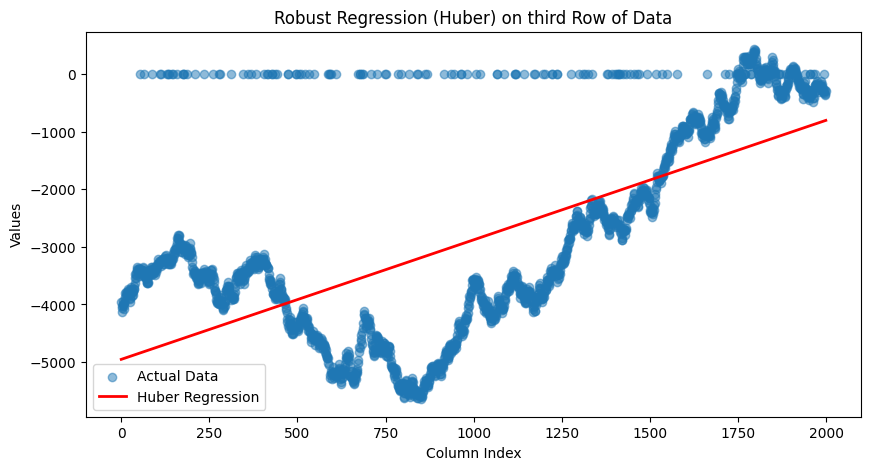

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor


# انتخاب سطر اول
X = np.arange(data.shape[1]).reshape(-1, 1)  # شاخص ستون‌ها به عنوان X
Y = data.iloc[2].values.reshape(-1, 1)  # مقادیر سطر اول به عنوان Y

# حذف مقادیر NaN (در صورت وجود)
mask = ~np.isnan(Y.squeeze())
X, Y = X[mask], Y[mask]

# ایجاد و آموزش مدل HuberRegressor
huber = HuberRegressor()
huber.fit(X, Y.ravel())
Y_pred = huber.predict(X)

# رسم نتایج
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label="Huber Regression", linewidth=2)
plt.xlabel("Column Index")
plt.ylabel("Values")
plt.legend()
plt.title("Robust Regression (Huber) on third Row of Data")
plt.show()


In [ ]:
Y_pred

array([-4952.87680353, -4950.80113477, -4948.725466  , ...,
        -807.76627191,  -805.69060314,  -803.61493437])

In [ ]:
Y

array([[-3959.],
       [-4058.],
       [-4131.],
       ...,
       [ -278.],
       [ -346.],
       [ -299.]])

In [ ]:
!pip install --upgrade scikit-learn

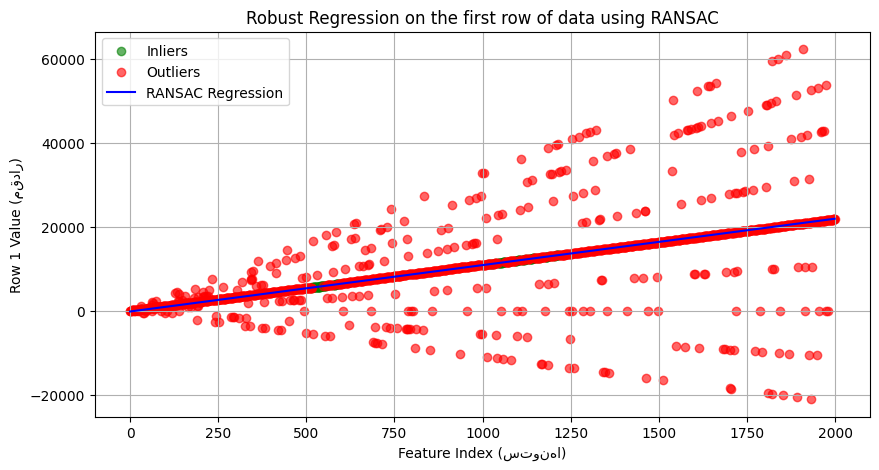

✅ مدل رگرسیون مقاوم (RANSAC): y = 11.04x + -173.84


In [ ]:
#RANSAC method
from sklearn.linear_model import RANSACRegressor, LinearRegression


# داده‌ی سطر اول
Y = data.iloc[0].values.reshape(-1, 1)
X = np.arange(len(Y)).reshape(-1, 1)

# مدل رگرسیون مقاوم با RANSAC
# Instead of base_estimator, use estimator
ransac = RANSACRegressor(estimator=LinearRegression(), min_samples=50, residual_threshold=10.0, random_state=42)
ransac.fit(X, Y)

# پیش‌بینی
Y_pred = ransac.predict(X)

# نقاط inlier و outlier را جدا کنیم
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# رسم نمودار
plt.figure(figsize=(10, 5))
plt.scatter(X[inlier_mask], Y[inlier_mask], color='green', label='Inliers', alpha=0.6)
plt.scatter(X[outlier_mask], Y[outlier_mask], color='red', label='Outliers', alpha=0.6)
plt.plot(X, Y_pred, color='blue', label='RANSAC Regression')
plt.xlabel("Feature Index (ستون‌ها)")
plt.ylabel("Row 1 Value (مقدار)")
plt.title("Robust Regression on the first row of data using RANSAC")
plt.legend()
plt.grid(True)
plt.show()

# چاپ ضرایب مدل
intercept = ransac.estimator_.intercept_[0]
slope = ransac.estimator_.coef_[0][0]
print(f"✅ مدل رگرسیون مقاوم (RANSAC): y = {slope:.2f}x + {intercept:.2f}")

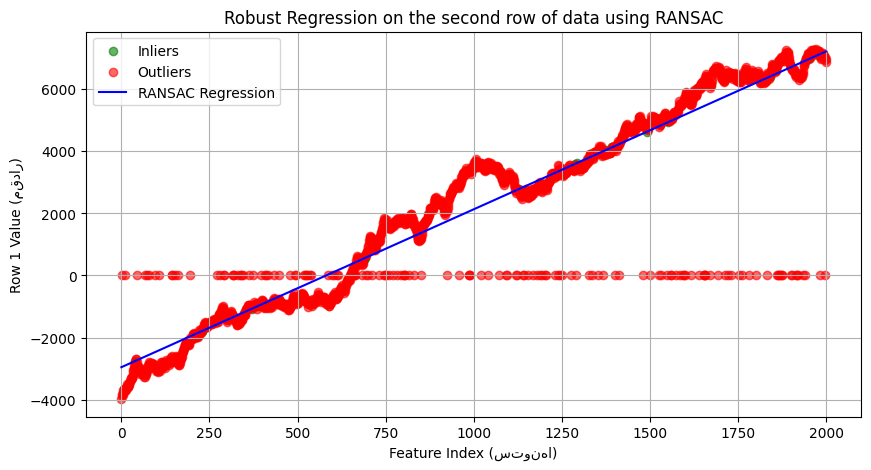

✅ مدل رگرسیون مقاوم (RANSAC): y = 5.08x + -2955.79


In [ ]:
#RANSAC method
from sklearn.linear_model import RANSACRegressor, LinearRegression


# داده‌ی سطر دوم
Y = data.iloc[1].values.reshape(-1, 1)
X = np.arange(len(Y)).reshape(-1, 1)

# مدل رگرسیون مقاوم با RANSAC
# Instead of base_estimator, use estimator
ransac = RANSACRegressor(estimator=LinearRegression(), min_samples=50, residual_threshold=10.0, random_state=42)
ransac.fit(X, Y)

# پیش‌بینی
Y_pred = ransac.predict(X)

# نقاط inlier و outlier را جدا کنیم
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# رسم نمودار
plt.figure(figsize=(10, 5))
plt.scatter(X[inlier_mask], Y[inlier_mask], color='green', label='Inliers', alpha=0.6)
plt.scatter(X[outlier_mask], Y[outlier_mask], color='red', label='Outliers', alpha=0.6)
plt.plot(X, Y_pred, color='blue', label='RANSAC Regression')
plt.xlabel("Feature Index (ستون‌ها)")
plt.ylabel("Row 1 Value (مقدار)")
plt.title("Robust Regression on the second row of data using RANSAC")
plt.legend()
plt.grid(True)
plt.show()

# چاپ ضرایب مدل
intercept = ransac.estimator_.intercept_[0]
slope = ransac.estimator_.coef_[0][0]
print(f"✅ مدل رگرسیون مقاوم (RANSAC): y = {slope:.2f}x + {intercept:.2f}")

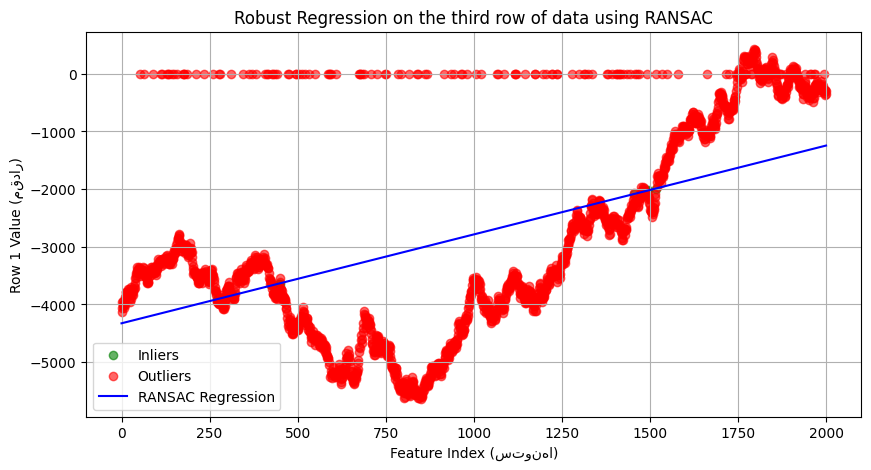

✅ مدل رگرسیون مقاوم (RANSAC): y = 1.54x + -4330.26


In [ ]:
#RANSAC method
from sklearn.linear_model import RANSACRegressor, LinearRegression


# داده‌ی سطر سوم
Y = data.iloc[2].values.reshape(-1, 1)
X = np.arange(len(Y)).reshape(-1, 1)

# مدل رگرسیون مقاوم با RANSAC
# Instead of base_estimator, use estimator
ransac = RANSACRegressor(estimator=LinearRegression(), min_samples=50, residual_threshold=10.0, random_state=42)
ransac.fit(X, Y)

# پیش‌بینی
Y_pred = ransac.predict(X)

# نقاط inlier و outlier را جدا کنیم
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# رسم نمودار
plt.figure(figsize=(10, 5))
plt.scatter(X[inlier_mask], Y[inlier_mask], color='green', label='Inliers', alpha=0.6)
plt.scatter(X[outlier_mask], Y[outlier_mask], color='red', label='Outliers', alpha=0.6)
plt.plot(X, Y_pred, color='blue', label='RANSAC Regression')
plt.xlabel("Feature Index (ستون‌ها)")
plt.ylabel("Row 1 Value (مقدار)")
plt.title("Robust Regression on the third row of data using RANSAC")
plt.legend()
plt.grid(True)
plt.show()

# چاپ ضرایب مدل
intercept = ransac.estimator_.intercept_[0]
slope = ransac.estimator_.coef_[0][0]
print(f"✅ مدل رگرسیون مقاوم (RANSAC): y = {slope:.2f}x + {intercept:.2f}")

##2.4.2

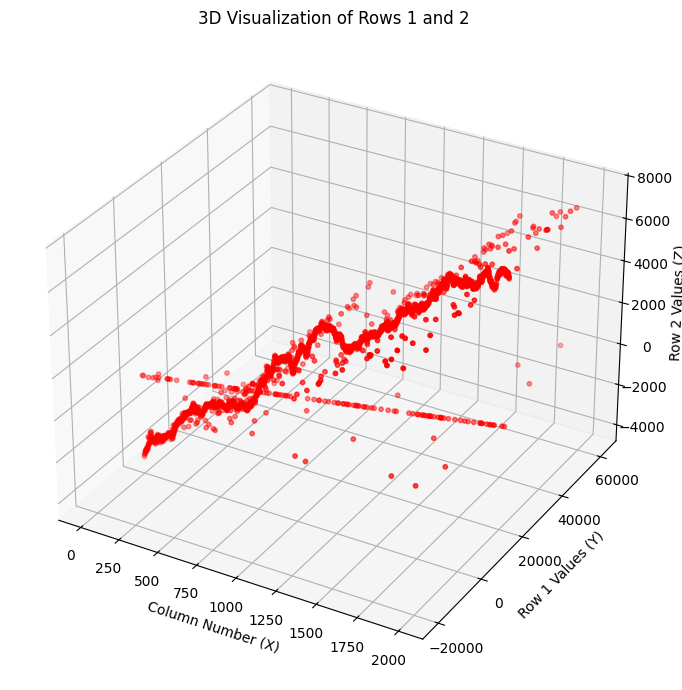

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Load your data
data = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")  # Make sure to update file name if needed

# Extract rows
row1 = data.iloc[0].values  # Row 1 → Y-axis
row2 = data.iloc[1].values  # Row 2 → Z-axis
x = np.arange(1, len(row1) + 1)  # Column numbers → X-axis

# Create 3D plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, row1, row2, c='red', marker='o', s=10)

# Set labels
ax.set_xlabel("Column Number (X)")
ax.set_ylabel("Row 1 Values (Y)")
ax.set_zlabel("Row 2 Values (Z)")
ax.set_title("3D Visualization of Rows 1 and 2")

plt.tight_layout()
plt.show()


<ipython-input-79-0d08f99990dc>:39: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



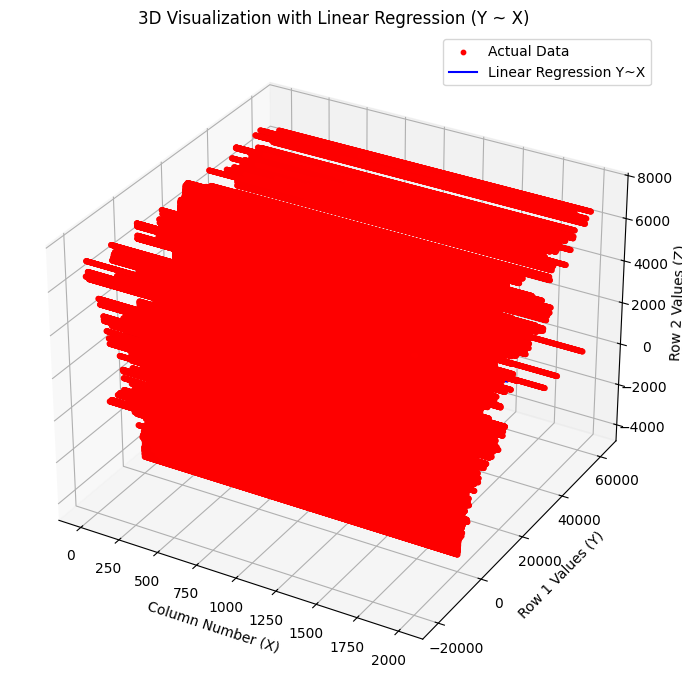

✅ Model: Y = 11.1862 * X + -184.4056


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Load your data
data = pd.read_csv("/content/mp1_lr_dataset_ai4032.csv")

# Extract rows
row1 = data.iloc[0].values  # Y-axis
row2 = data.iloc[1].values  # Z-axis
x = np.arange(1, len(row1) + 1).reshape(-1, 1)  # X-axis (column numbers)

# === رگرسیون خطی Y ~ X ===
model = LinearRegression()
model.fit(x, row1)  # فقط سطر اول به‌عنوان خروجی

# پیش‌بینی مقادیر Y
y_pred = model.predict(x)

# Create 3D plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data
ax.scatter(x, row1, row2, c='red', marker='o', s=10, label="Actual Data")

# Plot regression line (در فضای 3بعدی با z = 0)
ax.plot(x.flatten(), y_pred, zs=np.mean(row2), zdir='z', color='blue', label="Linear Regression Y~X")

# Labels and legend
ax.set_xlabel("Column Number (X)")
ax.set_ylabel("Row 1 Values (Y)")
ax.set_zlabel("Row 2 Values (Z)")
ax.set_title("3D Visualization with Linear Regression (Y ~ X)")
ax.legend()

plt.tight_layout()
plt.show()

# Print equation
print(f"✅ Model: Y = {model.coef_[0]:.4f} * X + {model.intercept_:.4f}")
